In [1]:
%matplotlib inline
import pandas as pd
import os
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from datetime import datetime
from fbprophet import Prophet
init_notebook_mode(connected=True)

In [2]:
def get_datetime_from_string(s, keep_utc=True):
    if keep_utc:
        return datetime.strptime(s + "00", '%Y-%m-%d %H:%M:%S%z')
    else:
        return datetime.strptime(s[:-3], '%Y-%m-%d %H:%M:%S')

In [3]:
GAS_PRICE_PATH = os.path.join('..', 'data', 'raw', 'input_data', 'Eingabedaten', 'Benzinpreise')
GAS_STATION_1_PATH = os.path.join(GAS_PRICE_PATH, '1.csv')
print(GAS_STATION_1_PATH)
df = pd.read_csv(GAS_STATION_1_PATH, names=['Timestamp', 'Price'], sep=';', )
df.head()

../data/raw/input_data/Eingabedaten/Benzinpreise/1.csv


,Timestamp,Price
0,2014-06-09 00:02:01+02,1659
1,2014-06-10 17:14:01+02,1669
2,2014-06-11 17:14:01+02,1669
3,2014-06-12 17:14:01+02,1679
4,2014-06-13 17:14:01+02,1689


In [4]:
iplot([{"x": [get_datetime_from_string(str(x)) for x in df.Timestamp], "y": df.Price}])

In [5]:
m = Prophet()
df_fb = df.copy()
df_fb['y'] = df_fb['Price']
df_fb['ds'] = df_fb['Timestamp'].apply(lambda x : get_datetime_from_string(str(x), keep_utc=False))
df_fb.drop(['Timestamp', 'Price'], inplace=True, axis=1)
m.fit(df_fb)

In [6]:
future = m.make_future_dataframe(periods=31)
future.tail()

,ds
6686,2017-10-18 23:03:06
6687,2017-10-19 23:03:06
6688,2017-10-20 23:03:06
6689,2017-10-21 23:03:06
6690,2017-10-22 23:03:06


In [7]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
6686,2017-10-18 23:03:06,1456.735569,1421.481973,1493.602612
6687,2017-10-19 23:03:06,1458.117365,1422.062950,1495.458083
6688,2017-10-20 23:03:06,1458.257989,1418.918400,1495.613541
6689,2017-10-21 23:03:06,1457.574083,1419.458326,1496.179846
6690,2017-10-22 23:03:06,1458.669464,1421.143575,1495.553279


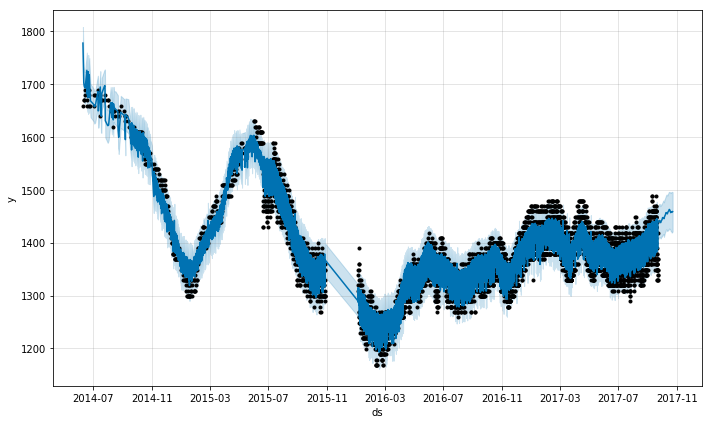

In [8]:
m.plot(forecast);

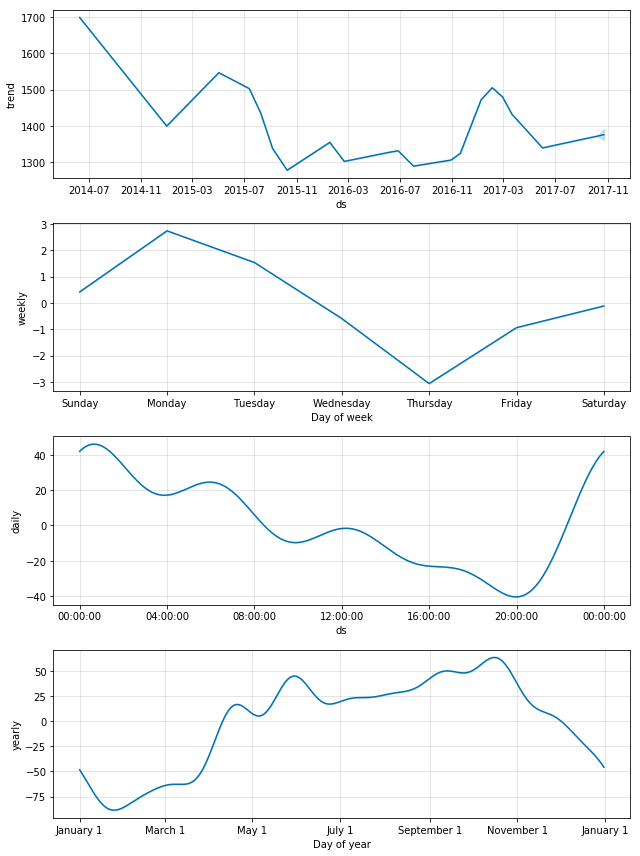

In [9]:
m.plot_components(forecast);